In [1]:
import os, sys
import torch
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../../fast-DiT")
sys.path.append("../modules")
from transformers import AutoImageProcessor, AutoModelForImageClassification
import dit 
import utility as ut
import datapipe as dp
import classifier as cl
import train as tt
import ortho as uno
import ascent as ta
import surgery as ts
import surgery_a as tsa
import ortho_s as tos
import batch as bt
import warnings
warnings.filterwarnings("ignore")

device = "mps" if torch.backends.mps.is_available() else "cpu"
exchange_classes = [208]
forget_class = 207
imagenet_json_path = "../data/ImageNet-1k/imagenet_class_index.json"
data_path = "../data/ImageNet-1k/2012"
model_path = "../data/ImageNet-1k/DiT-XL-2"
gen_kwargs = {"cfg_scale": 10., "n_samples": 10}
grid_size = 8
experiment_folder = '.'
num_experiments = 2

# set more experiment parameters
params = {
    "model_path": model_path,
    "batch_size": 1,
    "log_interval": 1,
    "collect_interval": "epoch",
    "save_steps": None,
    "exchange_classes": exchange_classes,
    "forget_class": forget_class,
    "data_path": data_path,
    "imagenet_json_path": imagenet_json_path,
    "freeze_K": 0,
    "n_samples": 1,
    "device": device,
    "diffusion_steps": 64
}

gen_kwargs = {
    "cfg_scale": 10. 
}

gen_kwargs_1 = {
    "device": device,
    "class_id": forget_class,
    "cfg_scale": 10., 
}

In [2]:
train_kwargs = params | {"num_steps": 2, "uniformity_weight": 0e3} | gen_kwargs
train_kwargs["folder"] = f"dit-batch-o"
be = bt.BatchExperiment(uno.train, train_kwargs, num_experiments, **gen_kwargs_1)
be.run()

Total params:     675.13M
Trainable params: 1.15M  (y: 1.15M, adaLN_last0: 0.00M, final: 0.00M)


Epochs:   0%|                                                        | 0/1 [00:00<?, ?it/s]

orth is tensor(0., device='mps:0', grad_fn=<DotBackward0>) tensor(0., device='mps:0', grad_fn=<DivBackward0>)


  0%|          | 0/64 [00:00<?, ?it/s]

orth is tensor(0., device='mps:0', grad_fn=<DotBackward0>) tensor(0., device='mps:0', grad_fn=<DivBackward0>)


  0%|          | 0/64 [00:00<?, ?it/s]

Epochs:   0%|                                                        | 0/1 [00:50<?, ?it/s]


Time taken by summarize_training is 0.4116 seconds
Total params:     675.13M
Trainable params: 1.15M  (y: 1.15M, adaLN_last0: 0.00M, final: 0.00M)


Epochs:   0%|                                                        | 0/1 [00:00<?, ?it/s]

orth is tensor(0., device='mps:0', grad_fn=<DotBackward0>) tensor(0., device='mps:0', grad_fn=<DivBackward0>)


  0%|          | 0/64 [00:00<?, ?it/s]

orth is tensor(0., device='mps:0', grad_fn=<DotBackward0>) tensor(0., device='mps:0', grad_fn=<DivBackward0>)


  0%|          | 0/64 [00:00<?, ?it/s]

Epochs:   0%|                                                        | 0/1 [00:50<?, ?it/s]


Time taken by summarize_training is 40.9781 seconds
Time taken by run is 160.6375 seconds


In [3]:
be.fid(100, device)

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x1047a2340>
Traceback (most recent call last):
  File "/Users/pman0581/miniconda3/envs/uno/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 1663, in __del__
    def __del__(self):

KeyboardInterrupt: 


Time taken by fid is 72.0563 seconds


python3.12(78615) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3.12(78616) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3.12(78617) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python3.12(78618) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


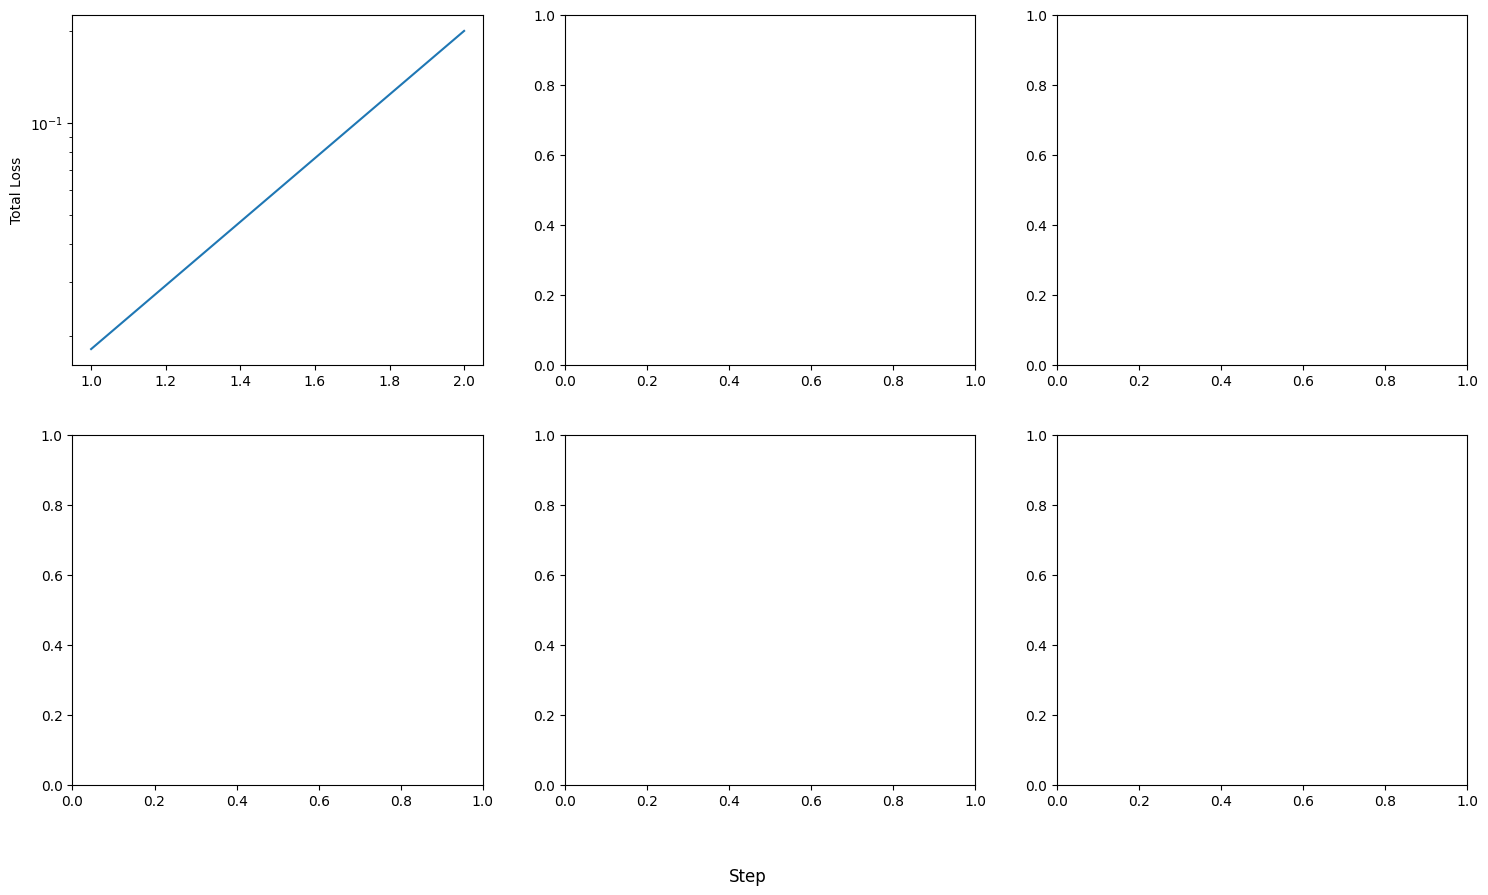

In [10]:
be.summarize(num_fid_samples=2, batch_size=256)

In [4]:
import dit